# Data Loading and Preparation
### This section loads the Google Trends (GT) weekly data and three Twitter datasets. Each dataset is stored in a variable, which allows for easy reference later. This step ensures all data is accessible and prepared for further analysis*

In [9]:
import pandas as pd
import os

# Load Google Trends and Twitter datasets
# Google Trends data is in weekly intervals; Twitter data includes IVCT_mpf, IVCT_delta, and HTLJ
weekly_gt_file = 'path/to/averaged_weekly_GT_data.csv'
monthly_gt_file = 'path/to/averaged_monthly_GT_data.csv'
ivct_mpf_file = 'path/to/df_IVCT_mpf_transfer copy.csv'
ivct_delta_file = 'path/to/df_IVCT_delta_transfer copy.csv'
df_htlj_file = 'path/to/df_HTLJ_transfer copy.csv'


# 2. Date Conversion and Standardization
 #### The load_and_preprocess_data function standardizes date formats across datasets by renaming columns and converting them to datetime format. This step ensures compatibility for time-based analyses

In [ ]:
# Function to load and preprocess datasets with date conversion
def load_and_preprocess_data(file_path, date_column=None, new_date_column=None):
    df = pd.read_csv(file_path)
    if date_column:
        df.rename(columns={date_column: new_date_column}, inplace=True)
        df[new_date_column] = pd.to_datetime(df[new_date_column], errors='coerce')
    return df

# Load GT datasets
df_GT_weekly = load_and_preprocess_data(weekly_gt_file, date_column='Unnamed: 0', new_date_column='GT_data_from')
df_GT_monthly = load_and_preprocess_data(monthly_gt_file, date_column='Unnamed: 0', new_date_column='GT_data_from')

# 3. Making Date Columns Timezone-Naive
## The function make_dates_timezone_naive removes timezone information, making all date columns timezone-naive. This ensures compatibility when merging datasets based on date

In [ ]:
def resample_twitter_data(df, date_column='tweet_date'):
    df.set_index(date_column, inplace=True)
    weekly_data = df.resample('W').agg({
        'retweet_count': 'sum',
        'like_count': 'sum',
        'quote_count': 'sum'
    })
    weekly_data['influence_score'] = weekly_data[['retweet_count', 'like_count', 'quote_count']].mean(axis=1)
    weekly_data['tweet_count'] = df.resample('W').size()
    return weekly_data

# Resample each Twitter dataset
df_IVCT_mpf_weekly = resample_twitter_data(df_IVCT_mpf)
# Repeat for other datasets...


# 4. Resampling Twitter Data to Weekly Intervals
### This part resamples each Twitter dataset to weekly intervals, calculating weekly sums for engagement metrics (retweet_count, like_count, quote_count) and creating an influence score based on these metrics

In [ ]:
def resample_twitter_data(df, date_column='tweet_date'):
    df.set_index(date_column, inplace=True)
    weekly_data = df.resample('W').agg({
        'retweet_count': 'sum',
        'like_count': 'sum',
        'quote_count': 'sum'
    })
    weekly_data['influence_score'] = weekly_data[['retweet_count', 'like_count', 'quote_count']].mean(axis=1)
    weekly_data['tweet_count'] = df.resample('W').size()
    return weekly_data

# Resample each Twitter dataset
df_IVCT_mpf_weekly = resample_twitter_data(df_IVCT_mpf)
# Repeat for other datasets...


# 5. Merging Datasets for Correlation Analysis
### The merge_for_correlation function merges each Twitter dataset with the Google Trends data on weekly dates
  ### This merged data allows for direct correlation and scatterplot analysis.

In [ ]:
def merge_for_correlation(gt_df, twitter_df, gt_date_column='GT_data_from'):
    gt_df = gt_df.reset_index() if gt_date_column not in gt_df.columns else gt_df
    gt_df.set_index(gt_date_column, inplace=True)
    merged_df = gt_df.join(twitter_df, how='inner')
    return merged_df

# Merge GT data with each Twitter dataset
correlation_data_mpf = merge_for_correlation(df_GT_weekly, df_IVCT_mpf_weekly)
# Repeat for other datasets...


# 6. Scatterplots with Trendlines for Specific Variables
### The plot_scatter_with_trendline function creates scatterplots with trendlines to visualize relationships between GT data and Twitter engagement metrics,such as tweet counts and influence scores

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_scatter_with_trendline(df, x_column, y_column, title):
    plt.figure(figsize=(8, 6))
    sns.regplot(x=x_column, y=y_column, data=df, scatter_kws={"s": 10}, line_kws={"color": "red"})
    plt.title(title)
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.show()

# Plot for Corruption vs Car Wash Operations in GT data
plot_scatter_with_trendline(df_GT_weekly, 'Corruption', 'Car Wash Operations', "Corruption vs Car Wash Operation (GT Data)")
# Plot for GT data vs. tweet counts and influence scores in Twitter datasets...


# 7. Temporal Analysis for Fine-Grained Correlations
## The temporal_correlation_analysis function resamples data by a specified period (e.g., quarterly or yearly) and computes a correlation matrix for each period, showing how correlations evolve over time

In [ ]:
def temporal_correlation_analysis(df, resample_period='Q', title_prefix=""):
    resampled_data = df.resample(resample_period).mean()
    correlation_matrix = resampled_data.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f"{title_prefix} Correlation Matrix ({resample_period})")
    plt.show()

# Perform temporal analysis (quarterly and yearly)
temporal_correlation_analysis(correlation_data_mpf, 'Q', "IVCT MPF - Quarterly")
# Repeat for other datasets and time periods...


# 8. Optional Regression Analysis with Time as a Variable
### This function performs a regression analysis to quantify the impact of time on the relationship between GT data and Twitter metrics. By including time as a variable, it controls for temporal changes in engagemen

In [ ]:
import statsmodels.api as sm

def regression_with_time_control(df, independent_var, dependent_var):
    df['time'] = (df.index - df.index[0]).days
    X = df[[independent_var, 'time']]
    X = sm.add_constant(X)
    y = df[dependent_var]
    model = sm.OLS(y, X).fit()
    print(f"Regression Analysis for {dependent_var} with {independent_var} and Time")
    print(model.summary())

# Example regression with time control
regression_with_time_control(correlation_data_mpf, 'Corruption', 'tweet_count')


# This is the practical application that I implemented

In [2]:
import pandas as pd

# Define the file paths
weekly_gt_file = 'C:/Users/Nima/Downloads/averaged_weekly_GT_data.csv'
monthly_gt_file = 'C:/Users/Nima/Downloads/averaged_monthly_GT_data.csv'
ivct_mpf_file = 'C:/Users/Nima/Downloads/df_IVCT_mpf_transfer copy.csv'
ivct_delta_file = 'C:/Users/Nima/Downloads/df_IVCT_delta_transfer copy.csv'
df_htlj_file = 'C:/Users/Nima/Downloads/df_HTLJ_transfer copy.csv'

# Function to load and preprocess datasets with date conversion
def load_and_preprocess_data(file_path, date_column=None, new_date_column=None):
    df = pd.read_csv(file_path)
    if date_column:
        df.rename(columns={date_column: new_date_column}, inplace=True)
        df[new_date_column] = pd.to_datetime(df[new_date_column], errors='coerce')
    return df

# Load GT datasets
df_GT_weekly = load_and_preprocess_data(weekly_gt_file, date_column='Unnamed: 0', new_date_column='GT_data_from')
df_GT_monthly = load_and_preprocess_data(monthly_gt_file, date_column='Unnamed: 0', new_date_column='GT_data_from')

# Load Twitter datasets and set date column
df_IVCT_mpf = load_and_preprocess_data(ivct_mpf_file, date_column='tweet_created_at', new_date_column='tweet_date')
df_IVCT_delta = load_and_preprocess_data(ivct_delta_file, date_column='tweet_created_at', new_date_column='tweet_date')
df_HTLJ = load_and_preprocess_data(df_htlj_file, date_column='tweet_created_at', new_date_column='tweet_date')

# Convert dates to timezone-naive
def make_dates_timezone_naive(df, date_column):
    if pd.api.types.is_datetime64_any_dtype(df[date_column]):
        df[date_column] = df[date_column].dt.tz_localize(None)
    return df

# Apply timezone-naive conversion
df_GT_weekly = make_dates_timezone_naive(df_GT_weekly, 'GT_data_from')
df_IVCT_mpf = make_dates_timezone_naive(df_IVCT_mpf, 'tweet_date')
df_IVCT_delta = make_dates_timezone_naive(df_IVCT_delta, 'tweet_date')
df_HTLJ = make_dates_timezone_naive(df_HTLJ, 'tweet_date')

# Resample Twitter data to weekly intervals and calculate engagement metrics
def resample_twitter_data(df, date_column='tweet_date'):
    df.set_index(date_column, inplace=True)
    weekly_data = df.resample('W').agg({
        'retweet_count': 'sum',
        'like_count': 'sum',
        'quote_count': 'sum'
    })
    weekly_data['influence_score'] = weekly_data[['retweet_count', 'like_count', 'quote_count']].mean(axis=1)
    weekly_data['tweet_count'] = df.resample('W').size()
    return weekly_data

# Resample each Twitter dataset to weekly intervals
df_IVCT_mpf_weekly = resample_twitter_data(df_IVCT_mpf)
df_IVCT_delta_weekly = resample_twitter_data(df_IVCT_delta)
df_HTLJ_weekly = resample_twitter_data(df_HTLJ)

# Merge GT data with Twitter data based on weekly dates
def merge_for_correlation(gt_df, twitter_df, gt_date_column='GT_data_from'):
    # Reset the index of gt_df if it's already set
    if gt_date_column not in gt_df.columns:
        gt_df = gt_df.reset_index()
    gt_df.set_index(gt_date_column, inplace=True)
    merged_df = gt_df.join(twitter_df, how='inner')
    return merged_df

# Merge GT data with each Twitter dataset
correlation_data_mpf = merge_for_correlation(df_GT_weekly, df_IVCT_mpf_weekly)
correlation_data_delta = merge_for_correlation(df_GT_weekly, df_IVCT_delta_weekly)
correlation_data_htlj = merge_for_correlation(df_GT_weekly, df_HTLJ_weekly)

# Display the merged datasets for a preview
print("\nMerged Data for IVCT MPF:\n", correlation_data_mpf.head())
print("\nMerged Data for IVCT Delta:\n", correlation_data_delta.head())
print("\nMerged Data for HTLJ:\n", correlation_data_htlj.head())



Merged Data for IVCT MPF:
             Corruption  Car Wash Operations  Economy  isPartial  \
2014-01-05         7.0                  6.0     47.0        0.0   
2014-01-12         6.0                  6.0     43.0        0.0   
2014-01-19         7.0                  6.0     47.0        0.0   
2014-01-26        10.0                  6.0     48.0        0.0   
2014-02-02        10.0                  6.0     59.0        0.0   

            retweet_count  like_count  quote_count  influence_score  \
2014-01-05             44          19            0        21.000000   
2014-01-12             78          25            0        34.333333   
2014-01-19             72          21            0        31.000000   
2014-01-26             79          22            0        33.666667   
2014-02-02            355          69            0       141.333333   

            tweet_count  
2014-01-05           10  
2014-01-12           24  
2014-01-19           30  
2014-01-26           30  
2014-02-02  

Correlation Matrix for IVCT MPF Data


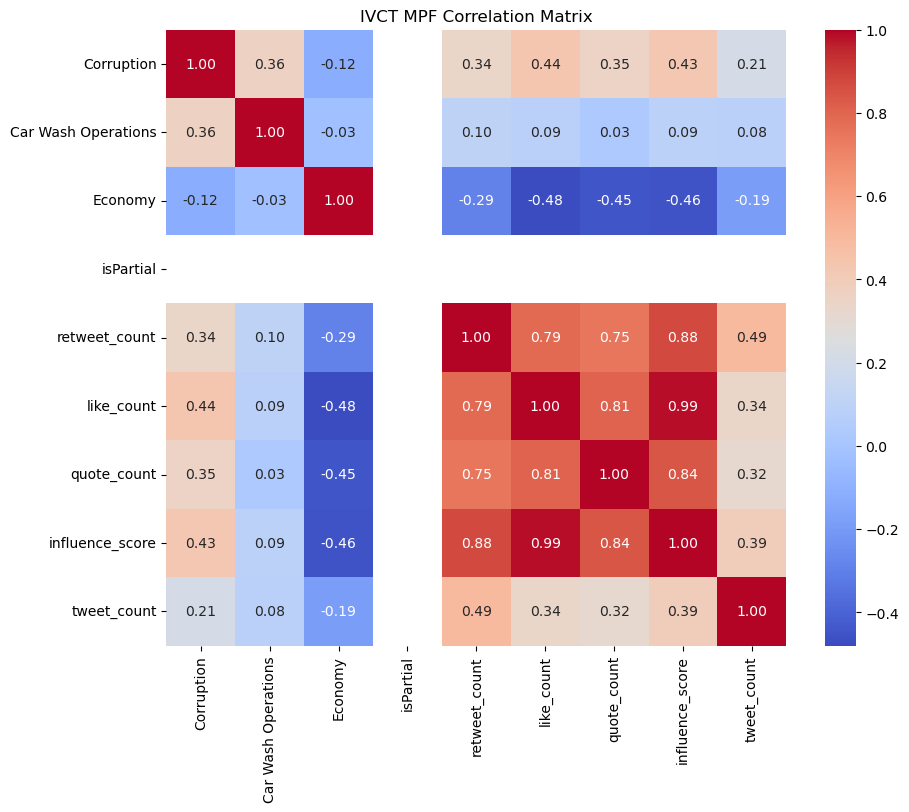

Correlation Matrix for IVCT Delta Data


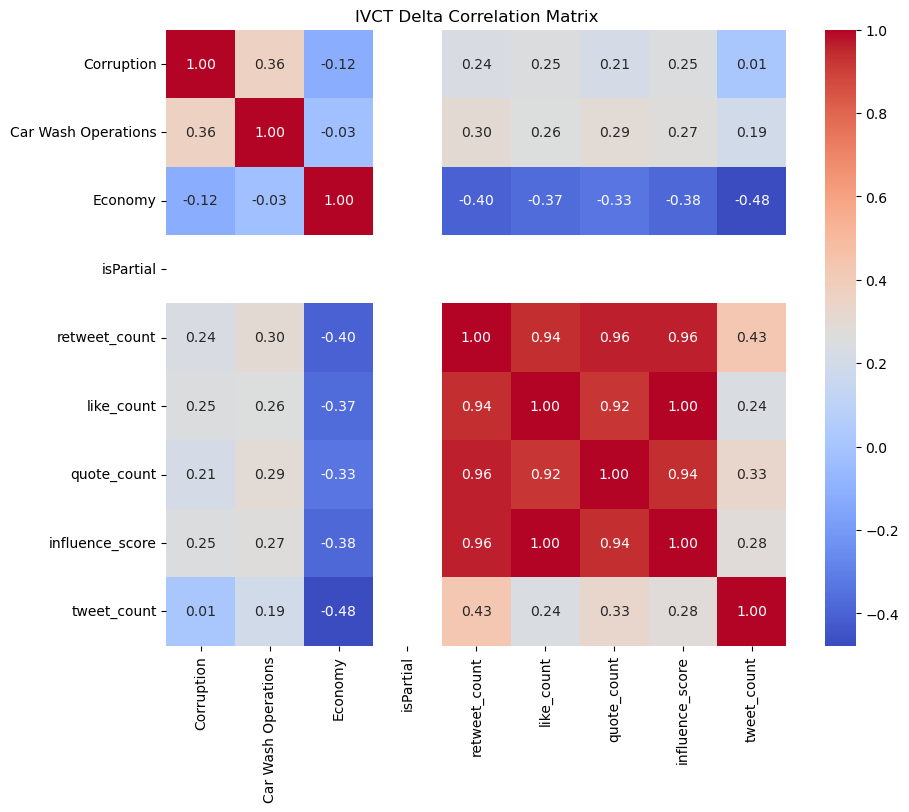

Correlation Matrix for HTLJ Data


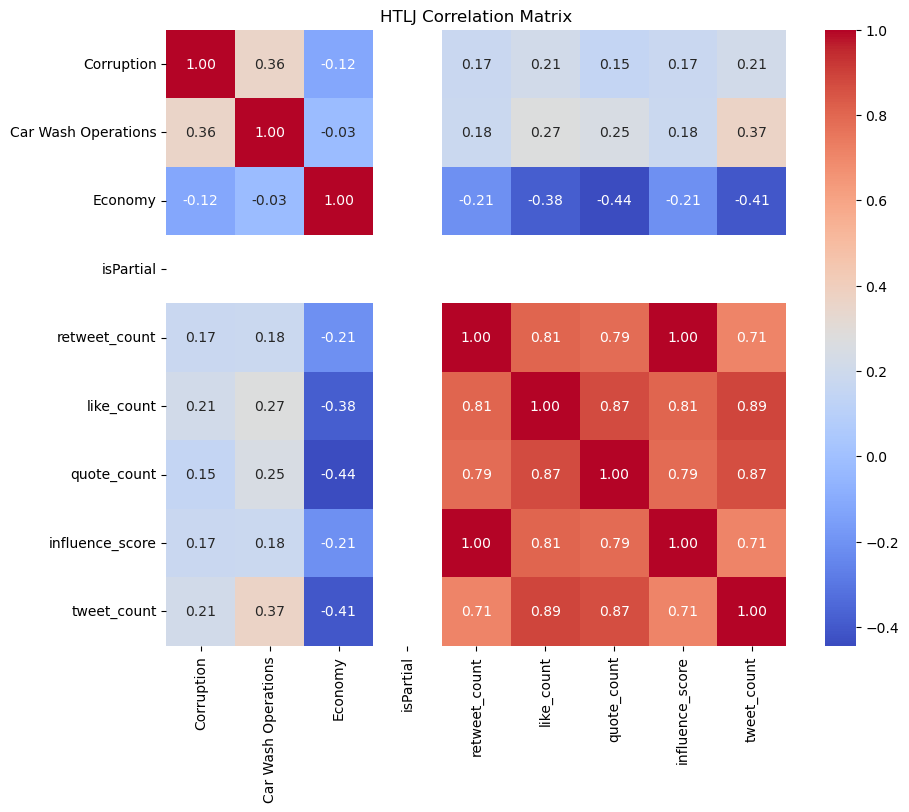

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to calculate and display correlation matrix
def display_correlation_matrix(df, title):
    # Calculate the correlation matrix
    correlation_matrix = df.corr()
    
    # Display the correlation matrix as a heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(title)
    plt.show()

# Run correlation analysis on each merged dataset
print("Correlation Matrix for IVCT MPF Data")
display_correlation_matrix(correlation_data_mpf, "IVCT MPF Correlation Matrix")

print("Correlation Matrix for IVCT Delta Data")
display_correlation_matrix(correlation_data_delta, "IVCT Delta Correlation Matrix")

print("Correlation Matrix for HTLJ Data")
display_correlation_matrix(correlation_data_htlj, "HTLJ Correlation Matrix")


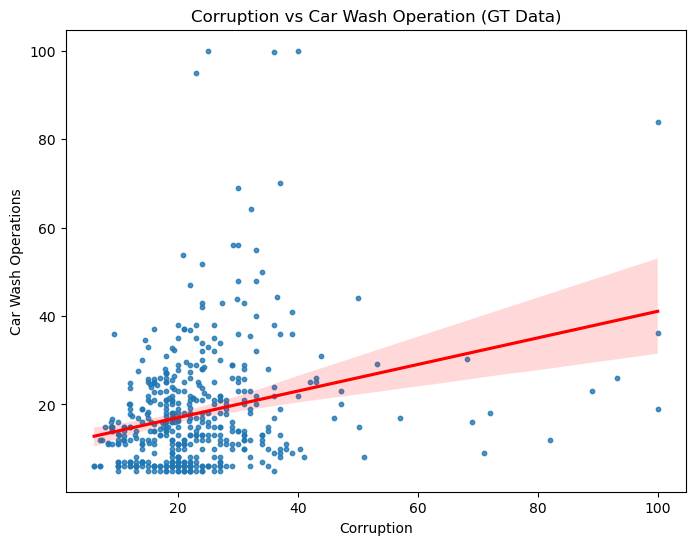

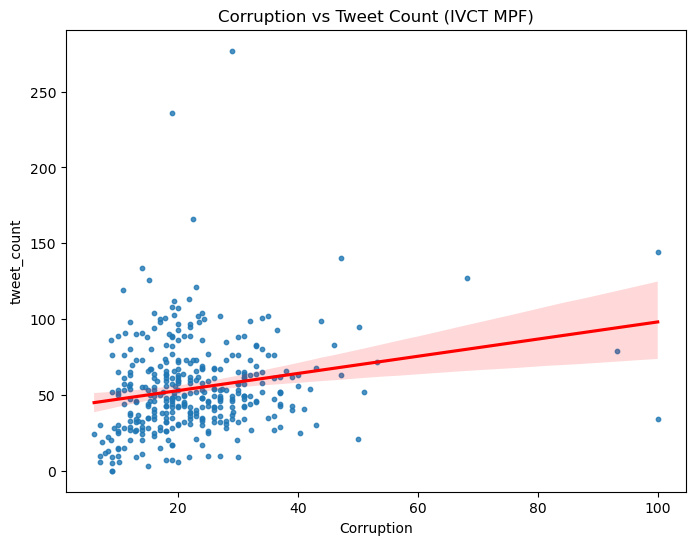

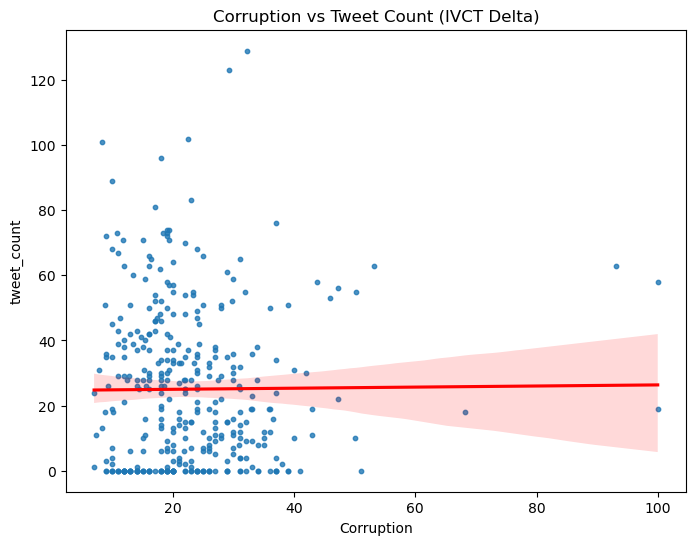

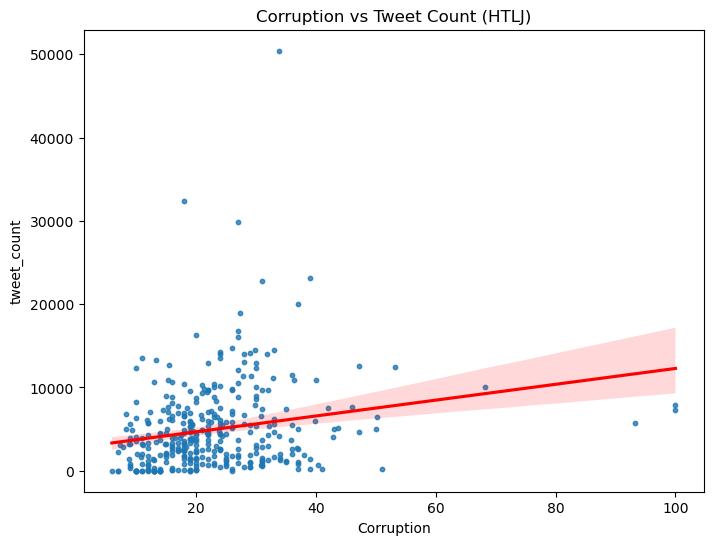

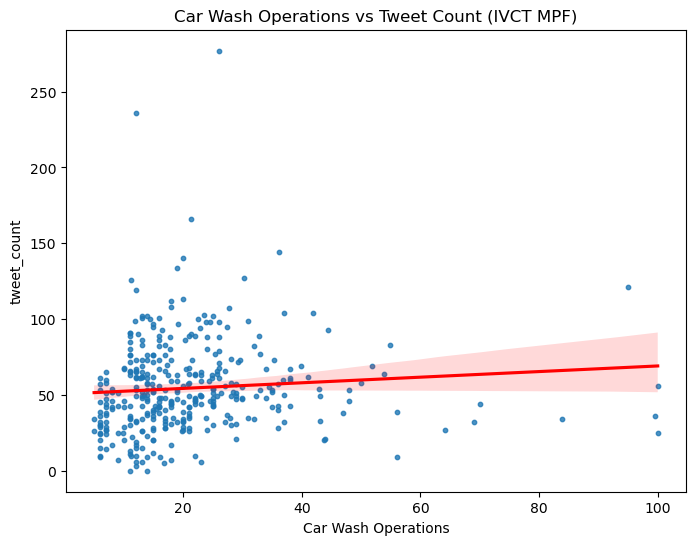

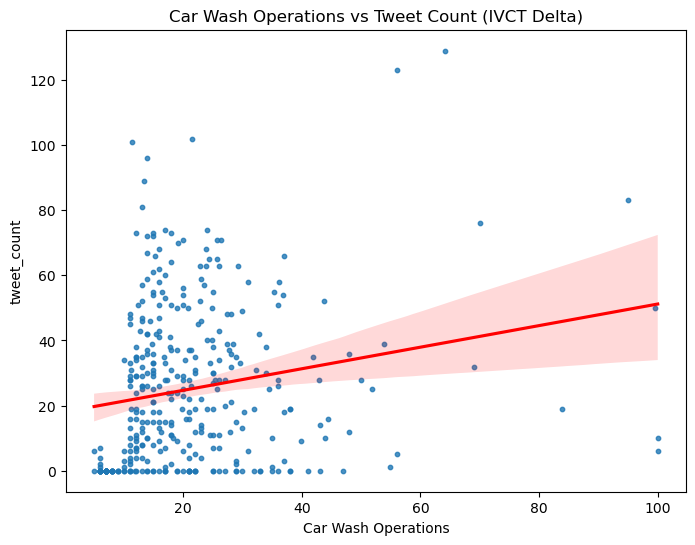

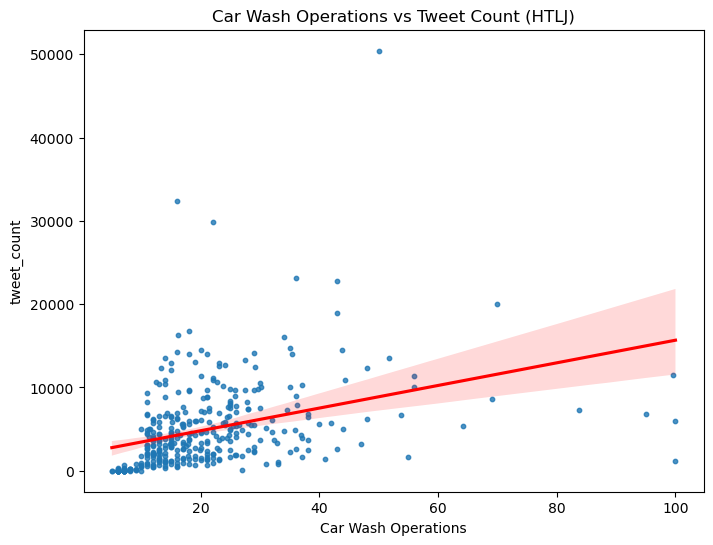

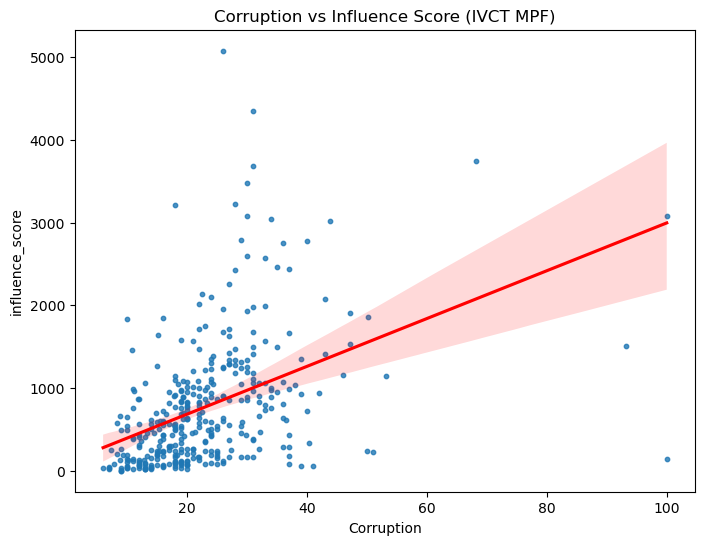

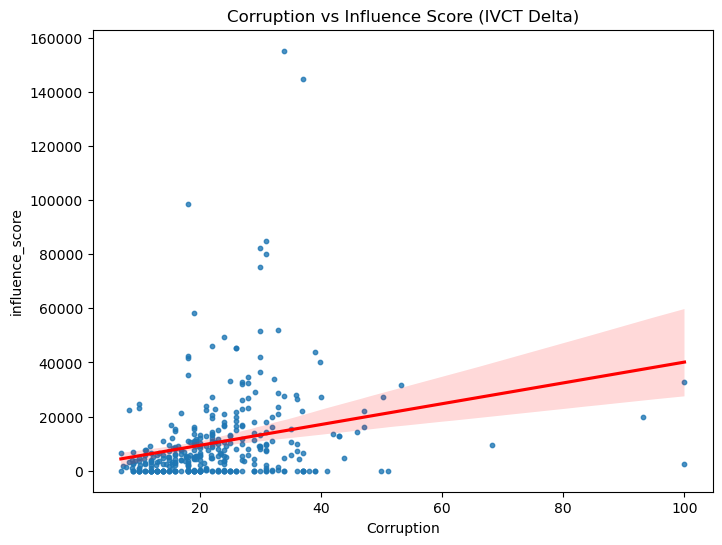

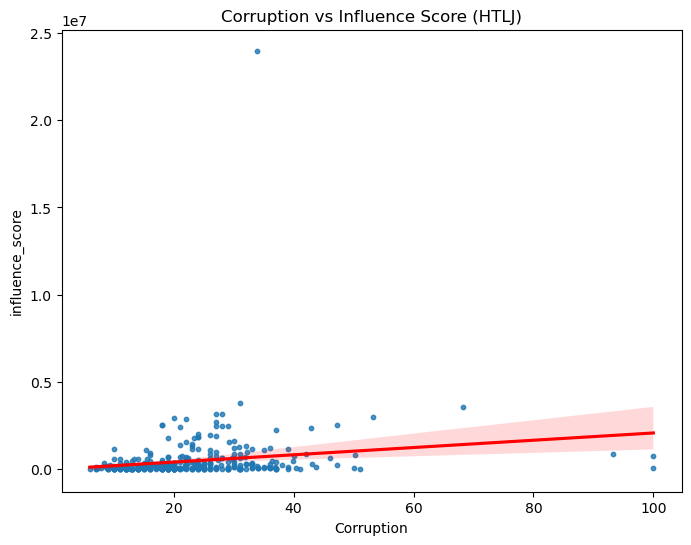

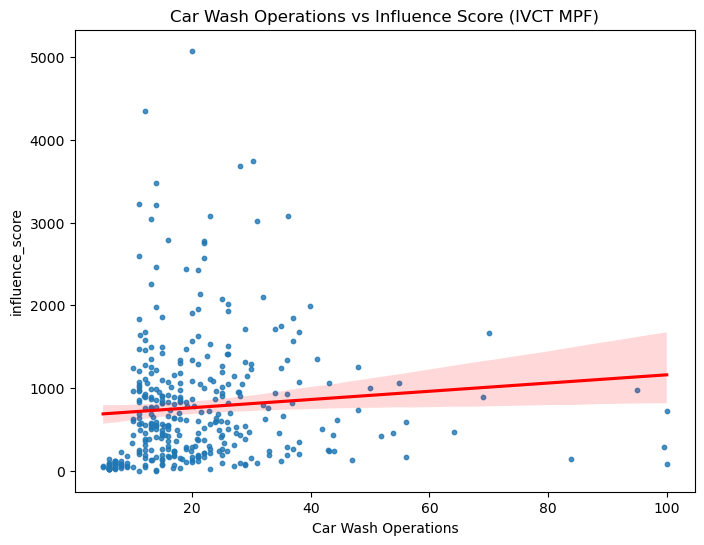

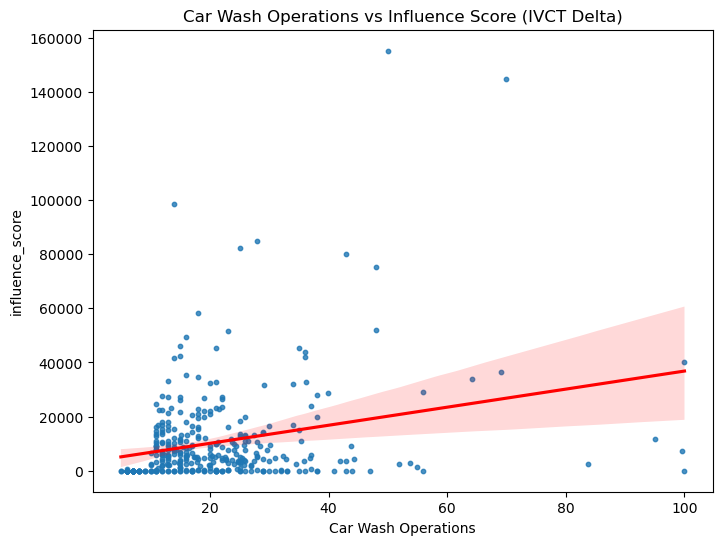

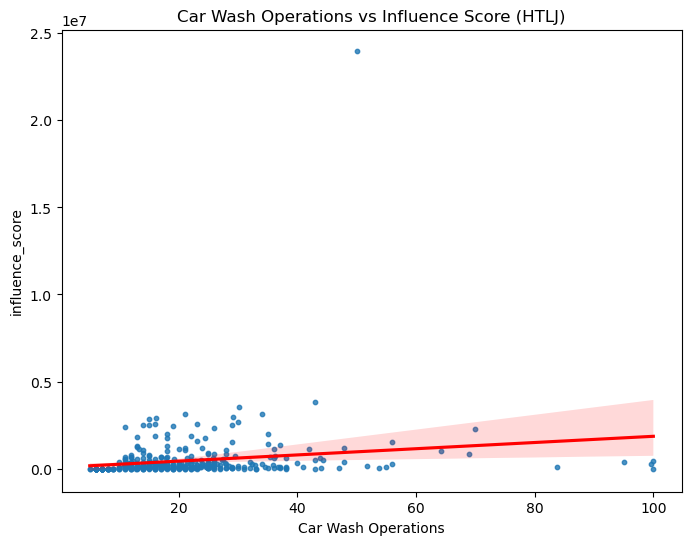

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to create scatterplot with trendline
def plot_scatter_with_trendline(df, x_column, y_column, title):
    plt.figure(figsize=(8, 6))
    sns.regplot(x=x_column, y=y_column, data=df, scatter_kws={"s": 10}, line_kws={"color": "red"})
    plt.title(title)
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.show()

# 1. Scatterplot for Corruption vs. Car Wash Operation in GT data
plot_scatter_with_trendline(df_GT_weekly, 'Corruption', 'Car Wash Operations', "Corruption vs Car Wash Operation (GT Data)")

# 2. Scatterplots for GT data vs. tweet counts
# Using the merged data for each Twitter dataset
plot_scatter_with_trendline(correlation_data_mpf, 'Corruption', 'tweet_count', "Corruption vs Tweet Count (IVCT MPF)")
plot_scatter_with_trendline(correlation_data_delta, 'Corruption', 'tweet_count', "Corruption vs Tweet Count (IVCT Delta)")
plot_scatter_with_trendline(correlation_data_htlj, 'Corruption', 'tweet_count', "Corruption vs Tweet Count (HTLJ)")

plot_scatter_with_trendline(correlation_data_mpf, 'Car Wash Operations', 'tweet_count', "Car Wash Operations vs Tweet Count (IVCT MPF)")
plot_scatter_with_trendline(correlation_data_delta, 'Car Wash Operations', 'tweet_count', "Car Wash Operations vs Tweet Count (IVCT Delta)")
plot_scatter_with_trendline(correlation_data_htlj, 'Car Wash Operations', 'tweet_count', "Car Wash Operations vs Tweet Count (HTLJ)")

# 3. Scatterplots for GT data vs. influence scores
plot_scatter_with_trendline(correlation_data_mpf, 'Corruption', 'influence_score', "Corruption vs Influence Score (IVCT MPF)")
plot_scatter_with_trendline(correlation_data_delta, 'Corruption', 'influence_score', "Corruption vs Influence Score (IVCT Delta)")
plot_scatter_with_trendline(correlation_data_htlj, 'Corruption', 'influence_score', "Corruption vs Influence Score (HTLJ)")

plot_scatter_with_trendline(correlation_data_mpf, 'Car Wash Operations', 'influence_score', "Car Wash Operations vs Influence Score (IVCT MPF)")
plot_scatter_with_trendline(correlation_data_delta, 'Car Wash Operations', 'influence_score', "Car Wash Operations vs Influence Score (IVCT Delta)")
plot_scatter_with_trendline(correlation_data_htlj, 'Car Wash Operations', 'influence_score', "Car Wash Operations vs Influence Score (HTLJ)")


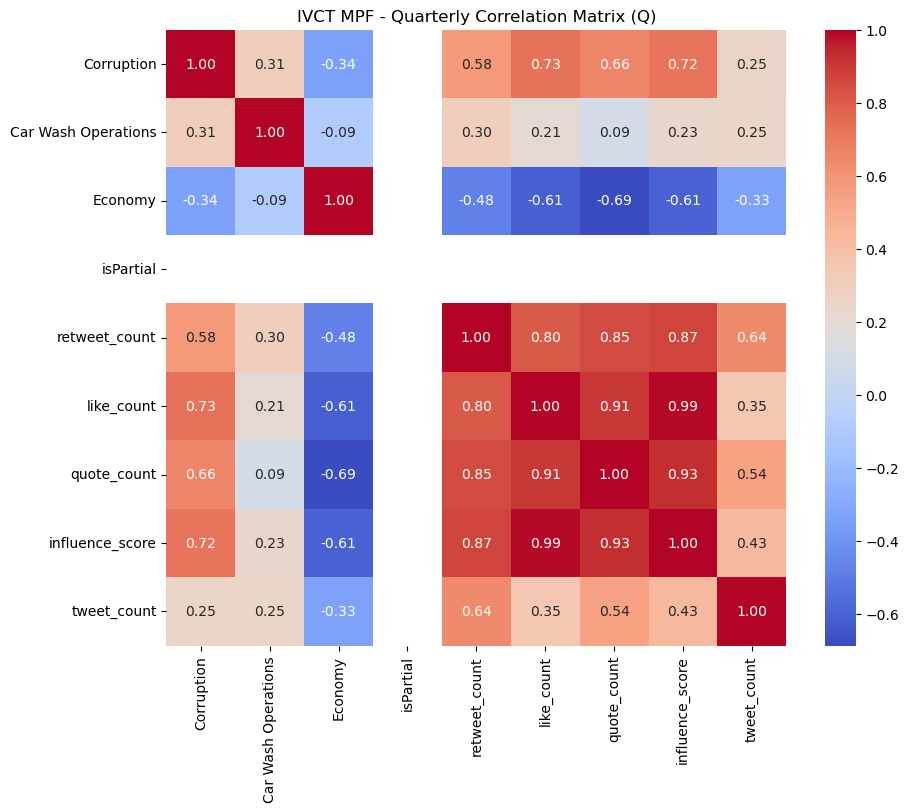

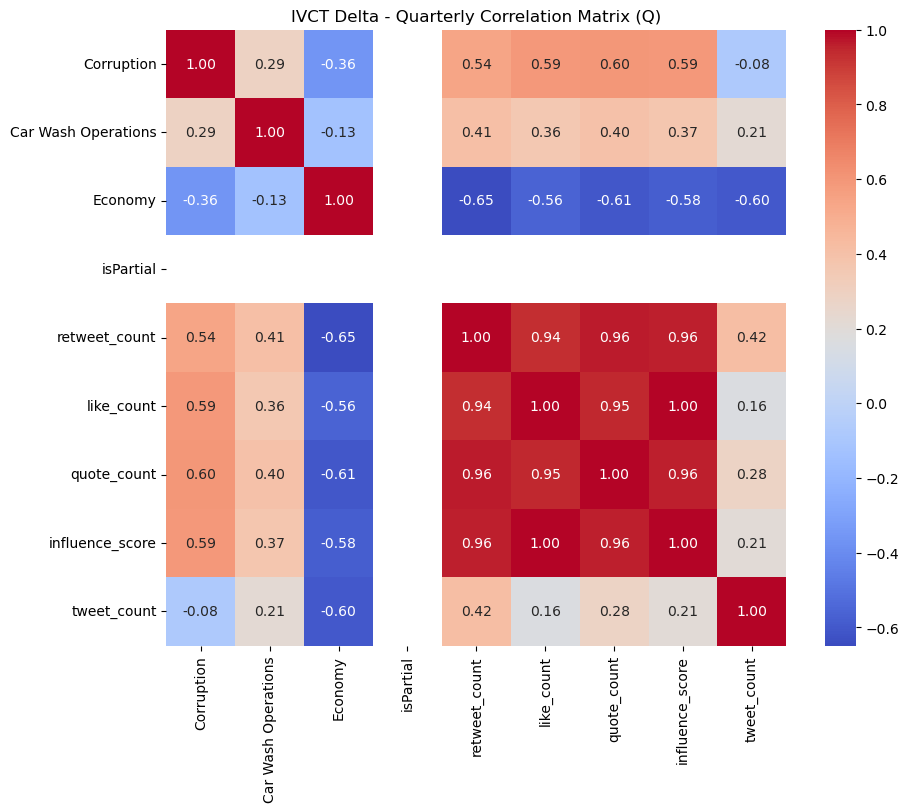

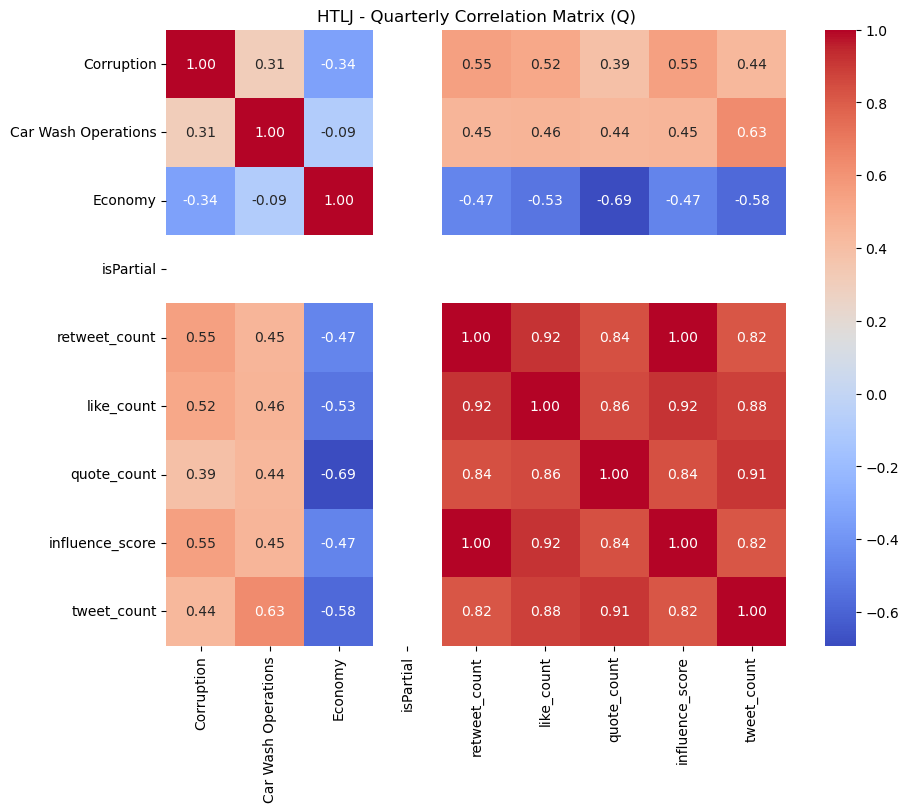

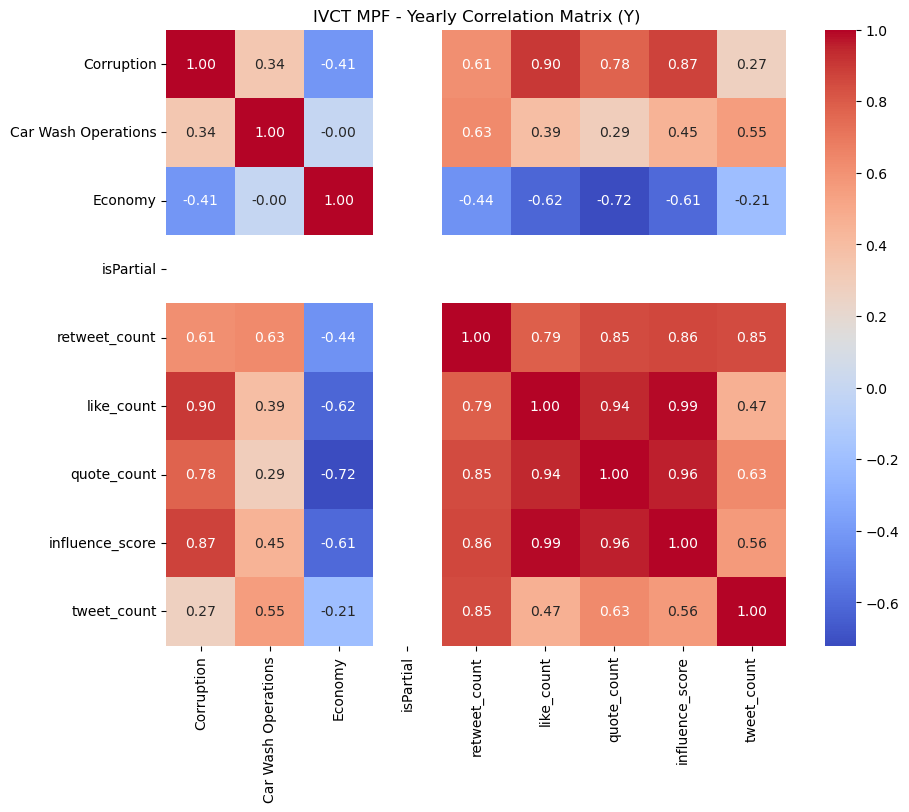

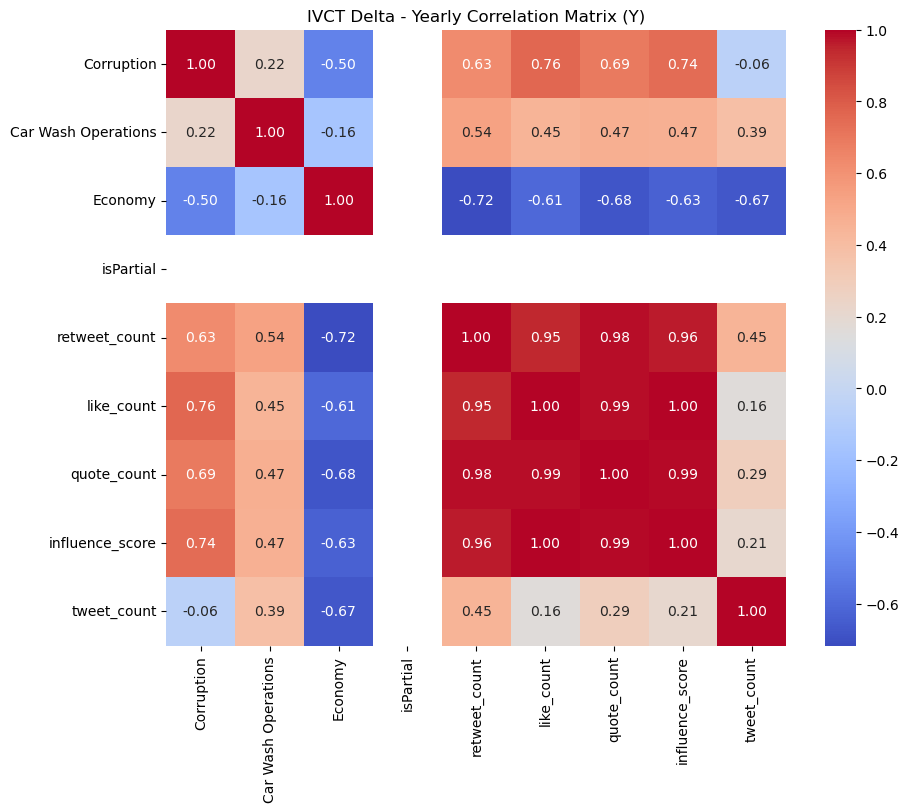

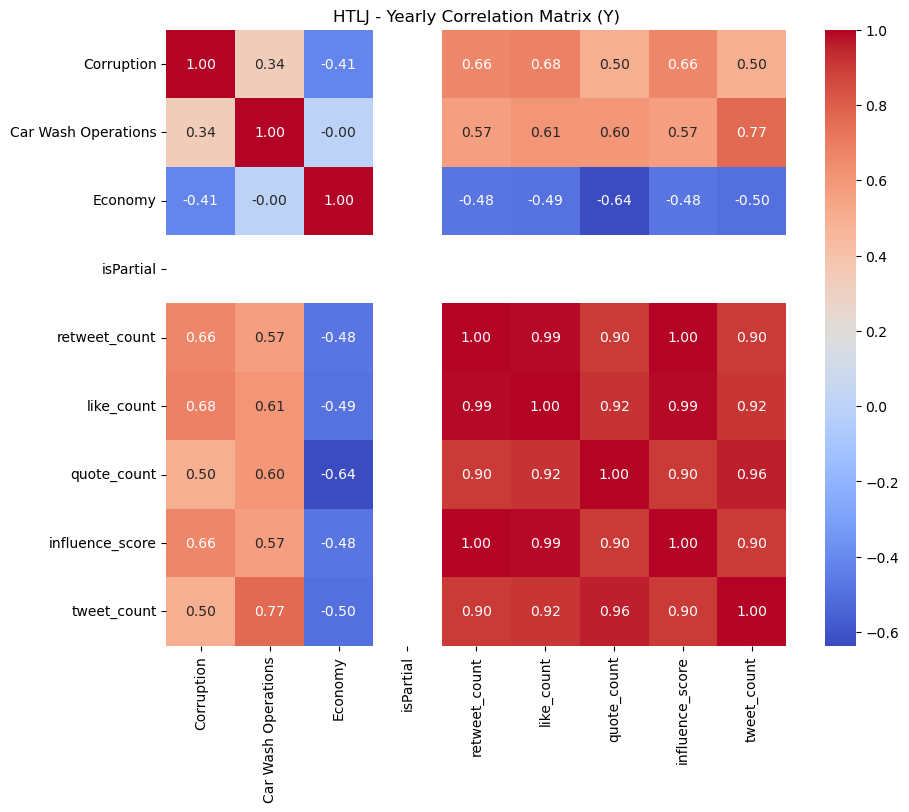

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to calculate and visualize temporal correlations
def temporal_correlation_analysis(df, resample_period='Q', title_prefix=""):
    # Resample data by the specified period (e.g., 'Q' for quarterly, 'Y' for yearly)
    resampled_data = df.resample(resample_period).mean()
    
    # Calculate the correlation matrix for the resampled period
    correlation_matrix = resampled_data.corr()
    
    # Visualize the correlation matrix as a heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f"{title_prefix} Correlation Matrix ({resample_period})")
    plt.show()

# Perform temporal analysis for each dataset (e.g., quarterly and yearly)
temporal_correlation_analysis(correlation_data_mpf, 'Q', "IVCT MPF - Quarterly")
temporal_correlation_analysis(correlation_data_delta, 'Q', "IVCT Delta - Quarterly")
temporal_correlation_analysis(correlation_data_htlj, 'Q', "HTLJ - Quarterly")

temporal_correlation_analysis(correlation_data_mpf, 'Y', "IVCT MPF - Yearly")
temporal_correlation_analysis(correlation_data_delta, 'Y', "IVCT Delta - Yearly")
temporal_correlation_analysis(correlation_data_htlj, 'Y', "HTLJ - Yearly")


In [6]:
import statsmodels.api as sm
import pandas as pd

# Function to perform a regression analysis with time as a factor
def regression_with_time_control(df, independent_var, dependent_var):
    # Ensure that the date index is converted to a numeric time variable
    df['time'] = (df.index - df.index[0]).days  # Time in days from start
    
    # Define the independent variables (including the time factor)
    X = df[[independent_var, 'time']]
    X = sm.add_constant(X)  # Adds an intercept to the model
    
    # Define the dependent variable
    y = df[dependent_var]
    
    # Fit the regression model
    model = sm.OLS(y, X).fit()
    
    # Display regression results
    print(f"Regression Analysis for {dependent_var} with {independent_var} and Time")
    print(model.summary())
    
# Example regression analysis
regression_with_time_control(correlation_data_mpf, 'Corruption', 'tweet_count')
regression_with_time_control(correlation_data_delta, 'Car Wash Operations', 'influence_score')


Regression Analysis for tweet_count with Corruption and Time
                            OLS Regression Results                            
Dep. Variable:            tweet_count   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     10.10
Date:                Wed, 06 Nov 2024   Prob (F-statistic):           5.37e-05
Time:                        14:28:08   Log-Likelihood:                -1762.1
No. Observations:                 366   AIC:                             3530.
Df Residuals:                     363   BIC:                             3542.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------